<a href="https://colab.research.google.com/github/bmontoyag/UTEC_MISTI_2026/blob/main/Housing_DataExploration_STUDENT_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Engineering with California Census Data Student Version
###Ingeniería de Características con Datos del Censo de California Versión de Estudiante

#Feature Engineering with California Census Data English Version (Version Inglés)

**If you haven't already, please hit :**

`File` -> `Save a Copy in Drive`

**to copy this notebook to your Google drive, and work on a copy. If you don't do this, your changes won't be saved!**

In [19]:
import numpy as np # a package for manipulating numbers and using arrays
import pandas as pd

import matplotlib.pyplot as plt # a package with plotting capabilities
import seaborn as sns # a package for data visualization

from sklearn.linear_model import LinearRegression # a package with an optimized LinearRegression class
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.datasets import fetch_openml

In [20]:
california_housing = fetch_openml(
    data_id=44977,
    as_frame=True,
    parser="pandas"
)

california_housing_df = california_housing.frame

## Explore and Understand the California Housing Dataset

In [21]:
print(california_housing.DESCR)

**Data Description**

Information on the variables was collected using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. Distances among the centroids of each block group were computed as measured in latitude and longitude. All the block groups reporting zero entries for the independent and dependent variables were excluded. The final data contained 20,640 observations on 9 variables. 

Each row in the dataset represents one census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The goal of the dataset is to predict the median house value. The original dataset description advised to predict the value using logarithmic transform.


**Attribute Descripti

In [22]:
california_housing_df.rename(columns={'longitude': 'longitude'}, inplace=True)
california_housing_df.rename(columns={'latitude': 'latitude'}, inplace=True)
california_housing_df.rename(columns={'housingMedianAge': 'housing_median_age'}, inplace=True)
california_housing_df.rename(columns={'totalRooms': 'avg_rooms'}, inplace=True)
california_housing_df.rename(columns={'totalBedrooms': 'avg_bedrooms'}, inplace=True)
california_housing_df.rename(columns={'population': 'population'}, inplace=True)
california_housing_df.rename(columns={'households': 'avg_household_size'}, inplace=True)
california_housing_df.rename(columns={'medianIncome': 'median_income'}, inplace=True)
california_housing_df.rename(columns={'medianHouseValue': 'median_house_value'}, inplace=True)

In [23]:
california_housing_df['avg_rooms'] = california_housing_df['avg_rooms'] / california_housing_df['avg_household_size']
california_housing_df['avg_bedrooms'] = california_housing_df['avg_bedrooms'] / california_housing_df['avg_household_size']
california_housing_df['avg_household_size'] = california_housing_df['population'] / california_housing_df['avg_household_size']
california_housing_df['median_house_value'] = california_housing_df['median_house_value'] / 100000

### EXERCISE: Explore and Understand the California Housing Dataset

Explore a pandas dataframe version of the data using the following code:

- `california_housing_df.head()` ,
- `california_housing_df.describe()` .

In [24]:
california_housing_df.head()

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,avg_household_size,median_income,median_house_value
0,-122.23,37.88,41,6.984127,1.023810,322,2.555556,8.3252,4.526
1,-122.22,37.86,21,6.238137,0.971880,2401,2.109842,8.3014,3.585
2,-122.24,37.85,52,8.288136,1.073446,496,2.802260,7.2574,3.521
3,-122.25,37.85,52,5.817352,1.073059,558,2.547945,5.6431,3.413
4,-122.25,37.85,52,6.281853,1.081081,565,2.181467,3.8462,3.422


In [25]:
california_housing_df.describe()

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,avg_household_size,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,5.429000,1.096675,1425.476744,3.070655,3.870671,2.068558
std,2.003532,2.135952,12.585558,2.474173,0.473911,1132.462122,10.386050,1.899822,1.153956
min,-124.350000,32.540000,1.000000,0.846154,0.333333,3.000000,0.692308,0.499900,0.149990
25%,-121.800000,33.930000,18.000000,4.440716,1.006079,787.000000,2.429741,2.563400,1.196000
50%,-118.490000,34.260000,29.000000,5.229129,1.048780,1166.000000,2.818116,3.534800,1.797000
75%,-118.010000,37.710000,37.000000,6.052381,1.099526,1725.000000,3.282261,4.743250,2.647250
max,-114.310000,41.950000,52.000000,141.909091,34.066667,35682.000000,1243.333333,15.000100,5.000010


## Visualize and Interpret Features

* Where are the most expensive houses located? How does this relate to the geography of California?
* How would you interpret the histograms of the features and label of the California Housing dataset?

### EXERCISE: Visualize California Housing Prices by Geographic Location

In this exercise, you’ll create a scatter plot to visualize how house prices vary by location across California. Each point will represent a location, and the color will indicate the median house value, helping you to see any geographic trends in housing prices.

1. **Create the Scatter Plot:**
   - Plot `longitude` on the x-axis and `latitude` on the y-axis.
   - Use the `median_house_value` column to set the color (`c`) of each point.

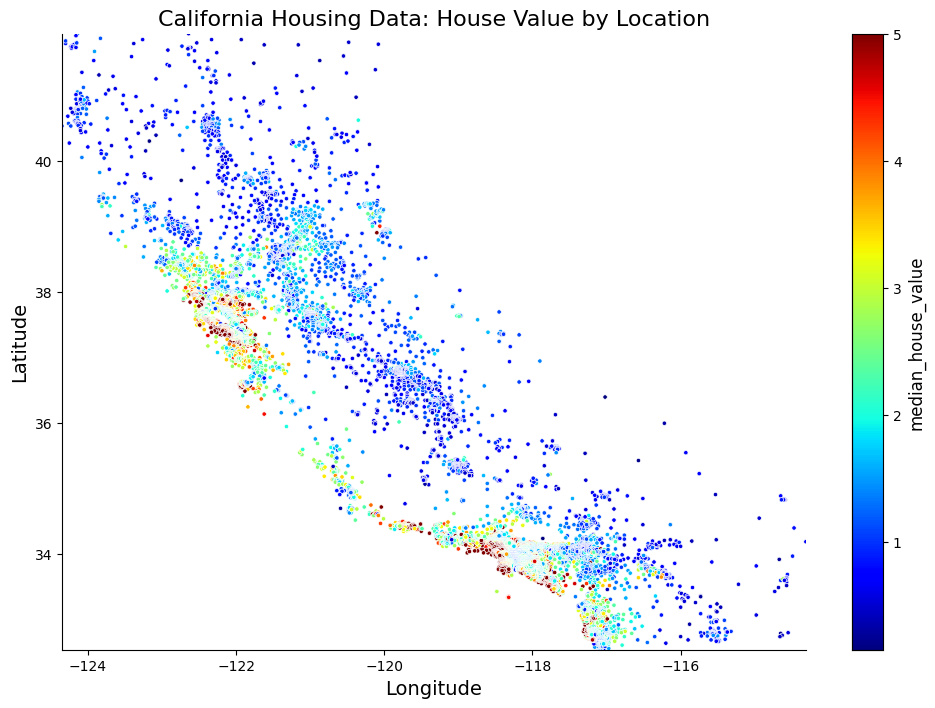

In [37]:
# Create a scatter plot with adjustments
plt.figure(figsize=(12, 8))  # Set the figure size
scatter = plt.scatter(
    california_housing_df["longitude"],
    california_housing_df["latitude"],
    s=10,
    c=california_housing_df["median_house_value"],
    cmap="jet",
    edgecolor='w',
    linewidth=0.5
)

# Set plot limits to avoid extreme outliers
plt.xlim([california_housing_df["longitude"].min(), california_housing_df["longitude"].max()])
plt.ylim([california_housing_df["latitude"].min(), california_housing_df["latitude"].max()])

# Add a colorbar with a label
cbar = plt.colorbar(scatter)
cbar.set_label('median_house_value', fontsize=12)  # Label the color bar

# Add labels and a title
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("California Housing Data: House Value by Location", fontsize=16)  # Title of the plot

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


### EXERCISE: Visualize Distributions in the California Housing Dataset

In this exercise, you’ll create histograms for each feature in the California housing dataset to visualize the data distributions. This will help you understand the range, shape, and spread of each feature.

1. **Create the Histograms:**
   - Use `california_housing_df.hist()` to generate histograms for each feature in the dataset.
   - Set the following parameters to enhance the visual appearance:
     - `bins=50` to control the number of bins in each histogram for better granularity.
  - Set the following parameters to enhance the visual appearance:
    - `bins=50` to control the number of bins in each histogram for better granularity.
    - `figsize=(10, 6)` to adjust the overall size
    - `color='skyblue'` to set a pleasing color.
    - `edgecolor='black'` to outline each bar for clarity.

<Figure size 1000x600 with 0 Axes>

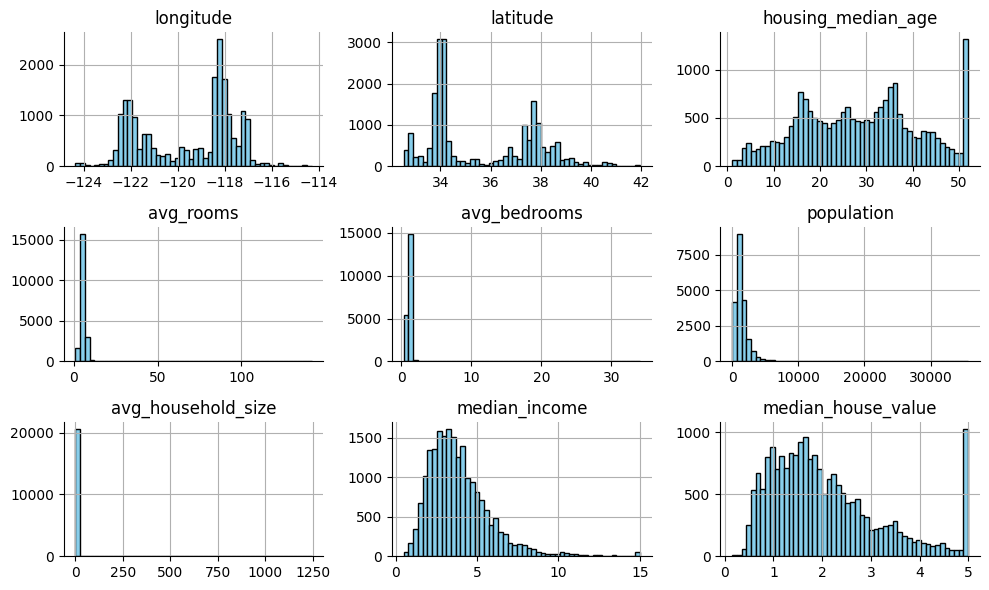

In [32]:
# Generate the histograms for the California housing data with adjustments for a prettier plot
plt.figure(figsize=(10, 6))  # Set a larger figure size for better visibility
california_housing_df.hist(bins=50,figsize=(10, 6), color='skyblue', edgecolor='black')  # create the histograms

# Use sns.despine to remove the top and right spines
sns.despine()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Visualize Relationships between Input and Output Data

### EXERCISE: Assess Feature Correlations and Build a Predictive Model

In this exercise, you’ll take a statistics-based approach to identify the most useful feature for predicting house prices. You’ll evaluate correlations, visualize relationships, and train a model using the strongest predictor.

1. **Calculate Correlations:**
   - Use the `.corr()` method on `california_housing_df` to generate the correlation matrix, showing the correlation coefficient \( r \) for each variable pair.


2. **Visualize the Correlation Matrix:**
   - Use `sns.heatmap()` to visualize the correlation matrix.

3. **Identify the Strongest Predictor:**
   - Examine the correlation values in the `median_house_value` row or column. Identify the feature with the highest positive correlation to `median_house_value`.

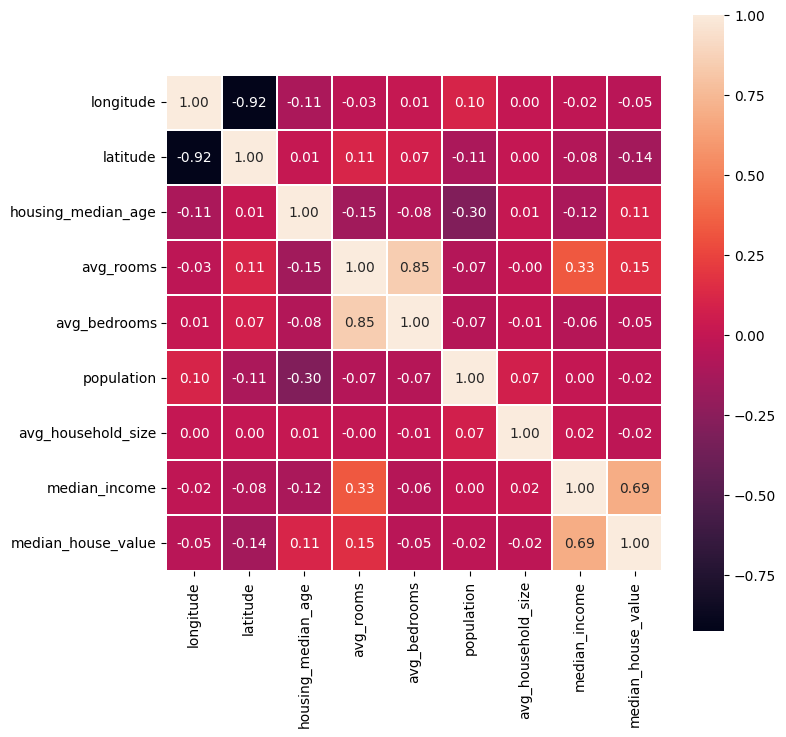

In [36]:
# Generate correlation matrix
corr_matrix = california_housing_df.corr()

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidth=.3, square=True)

## Select the Best Features


* Add the names of the columns to the X feature vector below and then run the code
* Assess your model performance with the mean squared error and the squared correlation coefficient (the coeffcient of determination)



### EXERCISE: Build a Predictive Model with Best Features

1. **Train a Linear Regression Model with the Best Feature:**
   - Select this feature as `X` (input variable) and set `y` to `median_house_value`.
   - Train a `LinearRegression` model using this single feature.

2. **Evaluate and Visualize Model Performance:**
   - Generate predictions for `X` and create a scatter plot comparing `y` (true values) and the predictions to assess model accuracy.

Mean Squared Error: 1.3038777748380284
R-squared Score: 0.020782185428578348


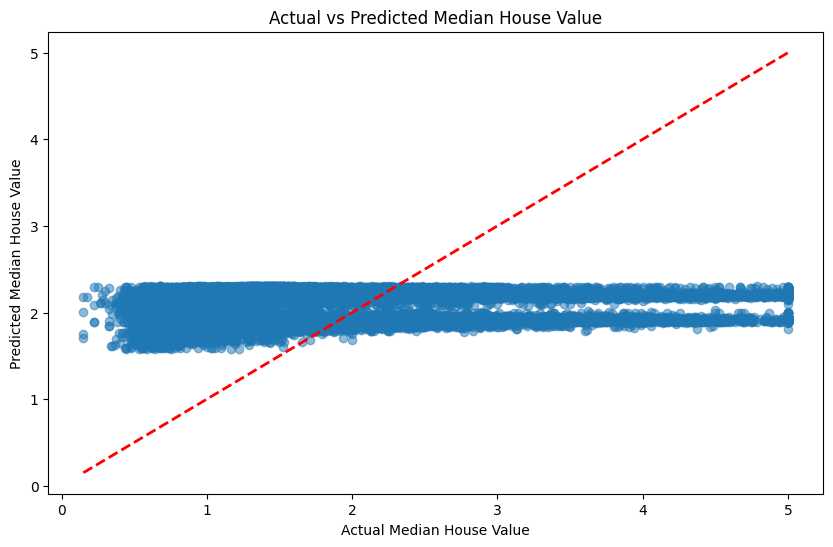

          Coefficient
latitude    -0.077883


In [53]:
# Select features and the target variable
X = california_housing_df[["latitude"]]

y = california_housing_df["median_house_value"]

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict the target variable on the test set
y_pred = model.predict(X)

# Evaluate the model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared score for the test set
r_squared = model.score(X, y)
print(f"R-squared Score: {r_squared}")

# Optional: Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Ideal Fit')  # Best-fit line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.show()

# Optional: Display the coefficients of the features
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

#Ingeniería de Características con Datos del Censo de California Versión Español (Spanish Version)

**Si aún no lo has hecho, presiona:**

`File` -> `Save a Copy in Drive`

**para copiar este cuaderno a su unidad de Google y trabajar en una copia. ¡Si no haces esto, tus cambios no se guardarán!**

In [ ]:
import numpy as np # un paquete para manipular números y usar matrices
import pandas as pd

import matplotlib.pyplot as plt # un paquete con capacidades de trazado
import seaborn as sns # un paquete para visualización de datos

from sklearn.linear_model import LinearRegression # un paquete con una clase LinearRegression optimizada
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.datasets import fetch_openml

In [ ]:
california_housing = fetch_openml(
    data_id=44977,
    as_frame=True,
    parser="pandas"
)

california_housing_df = california_housing.frame

## Explore y comprenda el conjunto de datos sobre vivienda de California

In [ ]:
print(california_housing.DESCR)

In [ ]:
california_housing_df.rename(columns={'longitude': 'longitude'}, inplace=True)
california_housing_df.rename(columns={'latitude': 'latitude'}, inplace=True)
california_housing_df.rename(columns={'housingMedianAge': 'housing_median_age'}, inplace=True)
california_housing_df.rename(columns={'totalRooms': 'avg_rooms'}, inplace=True)
california_housing_df.rename(columns={'totalBedrooms': 'avg_bedrooms'}, inplace=True)
california_housing_df.rename(columns={'population': 'population'}, inplace=True)
california_housing_df.rename(columns={'households': 'avg_household_size'}, inplace=True)
california_housing_df.rename(columns={'medianIncome': 'median_income'}, inplace=True)
california_housing_df.rename(columns={'medianHouseValue': 'median_house_value'}, inplace=True)

In [ ]:
california_housing_df['avg_rooms'] = california_housing_df['avg_rooms'] / california_housing_df['avg_household_size']
california_housing_df['avg_bedrooms'] = california_housing_df['avg_bedrooms'] / california_housing_df['avg_household_size']
california_housing_df['avg_household_size'] = california_housing_df['population'] / california_housing_df['avg_household_size']
california_housing_df['median_house_value'] = california_housing_df['median_house_value'] / 100000

### EJERCICIO: Explore y comprenda el conjunto de datos de vivienda de California


Explore a pandas dataframe version of the data using the following code:

- `california_housing_df.head()` ,
- `california_housing_df.describe()` .

In [ ]:
california_housing_df.head()

In [ ]:
california_housing_df.describe()

## Visualizar e interpretar características

* ¿Dónde están ubicadas las casas más caras? ¿Cómo se relaciona esto con la geografía de California?
* ¿Cómo interpretaría los histogramas de las características y la etiqueta del conjunto de datos de Vivienda de California?

### EJERCICIO: Visualice los precios de la vivienda en California por ubicación geográfica

En este ejercicio, creará un diagrama de dispersión para visualizar cómo varían los precios de las viviendas según la ubicación en California. Cada punto representará una ubicación y el color indicará el valor medio de la vivienda, lo que le ayudará a ver las tendencias geográficas en los precios de la vivienda.

1. **Crea el diagrama de dispersión:**
   - Trace la "longitud" en el eje x y la "latitud" en el eje y.
   - Utilice la columna `median_house_value` para establecer el color (`c`) de cada punto.

In [ ]:
# Crear un diagrama de dispersión con ajustes
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
scatter = plt.scatter(
    california_housing_df[_________],
    california_housing_df[_________],
    s=10,
    c=california_housing_df[_________],
    cmap="jet",
    edgecolor='w',
    linewidth=0.5
)

# Establezca límites de trama para evitar valores atípicos extremos
plt.xlim([california_housing_df["longitude"].min(), california_housing_df["longitude"].max()])
plt.ylim([california_housing_df["latitude"].min(), california_housing_df["latitude"].max()])

# Agregar una barra de colores con una etiqueta
cbar = plt.colorbar(scatter)
cbar.set_label('_________', fontsize=12)  # Label the color bar

# Agregar etiquetas y un título
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("California Housing Data: House Value by Location", fontsize=16)  # Title of the plot

# Retire las espinas superior y derecha.
sns.despine()

# Mostrar la trama
plt.show()


### EJERCICIO: Visualice distribuciones en el conjunto de datos de vivienda de California

En este ejercicio, creará histogramas para cada característica del conjunto de datos de vivienda de California para visualizar las distribuciones de datos. Esto le ayudará a comprender el alcance, la forma y la extensión de cada característica.

1. **Crear los histogramas:**
   - Utilice `california_housing_df.hist()` para generar histogramas para cada característica del conjunto de datos.
   - Configure los siguientes parámetros para mejorar la apariencia visual:
     - `bins=50` para controlar el número de contenedores en cada histograma para una mejor granularidad.
  - Configure los siguientes parámetros para mejorar la apariencia visual:
    - `bins=50` para controlar el número de contenedores en cada histograma para una mejor granularidad.
    - `figsize=(10, 6)` para ajustar el tamaño total
    - `color='skyblue'` para establecer un color agradable.
    - `edgecolor='black'` para delinear cada barra para mayor claridad.

In [ ]:
# Genere los histogramas para los datos de vivienda de California con ajustes para una parcela más bonita.
plt.figure(figsize=(10, 6))  # Establezca un tamaño de figura más grande para una mejor visibilidad
_______________________________________________  # crear los histogramas

# Utilice sns.despine para quitar las espinas superior y derecha
sns.despine()

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Enseñar el plot
plt.show()

## Visualice las relaciones entre los datos de entrada y salida

### EJERCICIO: Evalúe las correlaciones de características y cree un modelo predictivo

En este ejercicio, adoptará un enfoque basado en estadísticas para identificar la característica más útil para predecir los precios de la vivienda. Evaluará correlaciones, visualizará relaciones y entrenará un modelo utilizando el predictor más sólido.

1. **Calcular correlaciones:**
   - Utilice el método `.corr()` en `california_housing_df` para generar la matriz de correlación, que muestra el coeficiente de correlación \( r \) para cada par de variables.

2. **Visualice la matriz de correlación:**
   - Utilice `sns.heatmap()` para visualizar la matriz de correlación.

3. **Identifique el predictor más fuerte:**
   - Examine los valores de correlación en la fila o columna `median_house_value`. Identifique la característica con la correlación positiva más alta con el "valor_median_house".

In [ ]:
# Generar matriz de correlación
corr_matrix = _______________________

# Visualizar matriz de correlación
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(__________, annot=True, fmt=".2f", linewidth=.3, square=True)

## Seleccione las mejores características


* Agregue los nombres de las columnas al vector de características X a continuación y luego ejecute el código
* Evalúe el rendimiento de su modelo con el error cuadrático medio y el coeficiente de correlación al cuadrado (el coeficiente de determinación)



### EJERCICIO: Construya un modelo predictivo con las mejores características

1. **Entrene un modelo de regresión lineal con la mejor característica:**
   - Seleccione esta característica como `X` (variable de entrada) y establezca `y` en `median_house_value`.
   - Train a `LinearRegression` model using this single feature.

2. **Evalúe y visualice el rendimiento del modelo:**
   - Genere predicciones para "X" y cree un diagrama de dispersión que compare "y" (valores verdaderos) y las predicciones para evaluar la precisión del modelo.

In [ ]:
# Seleccionar características y la variable objetivo
X = california_housing_df[[___________________]]
y = california_housing_df[___________________]

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(__, __)

# Predecir la variable objetivo en el conjunto de prueba
y_pred = model.predict(__)

# Evalúe el rendimiento del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Calcule la puntuación R cuadrado para el conjunto de prueba
r_squared = model.score(X, y)
print(f"R-squared Score: {r_squared}")

# Opcional: Trazar los valores reales frente a los previstos
plt.figure(figsize=(10,6))
plt.scatter(_____, _____, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Ideal Fit')  # Best-fit line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.show()

# Opcional: mostrar los coeficientes de las características.
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)